In [1]:
import dash
#import dash_core_components as dcc
from dash import dcc
import dash_core_components as dcc
#import dash_html_components as html
from dash import html
import dash_html_components as html
import pandas as pd
import requests

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_36280\2006489292.py:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_36280\2006489292.py:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [4]:
import os
import pandas as pd
pd.set_option("display.max_columns", None)

# Chemin vers le fichier CSV
chemin_fichier_csv = 'C:\\Users\\Utilisateur\\Documents\\Dash\\arbres10percent.csv'

# Charger le fichier CSV dans un DataFrame en spécifiant le délimiteur
df = pd.read_csv(chemin_fichier_csv)

# Afficher le DataFrame
df

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,128045,Arbre,Jardin,PARIS 19E ARRDT,NaN,NaN,JARDIN NOTRE DAME DE FATIMA,00000028,Pin,Pinus,nigra,NaN,40,0,NaN,NaN,"48.8792885194424, 2.4020022655233517"
1,207728,Arbre,Alignement,BOIS DE BOULOGNE,lampadaire,NaN,BOULEVARD MAILLOT,000101045,Marronnier,Aesculus,hippocastanum,NaN,137,16,Adulte,NON,"48.87841243166684, 2.274042338459129"
2,163942,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE DE THIAIS / AVENUE PRINCIPALE NORD /...,A14100011004,Peuplier,Populus,nigra,''Italica'',85,15,Jeune (arbre)Adulte,NON,"48.764869985050986, 2.3717678110722975"
3,157894,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / AVENUE DES FRENES MONOPH...,A05800144003,Frêne,Fraxinus,excelsior,''Diversifolia'',0,0,NaN,NaN,"48.90665459677289, 2.4193520134983086"
4,156855,Arbre,CIMETIERE,HAUTS-DE-SEINE,NaN,NaN,CIMETIERE DE BAGNEUX / AVENUE DE LA FRENAIE / ...,A02700081006,Frêne,Fraxinus,excelsior,NaN,0,0,NaN,NaN,"48.80281561313866, 2.3095620827318117"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,247851,Arbre,Alignement,PARIS 16E ARRDT,NaN,NaN,AVENUE DU RANELAGH,000103001,Tilleul,Tilia,platyphyllos,NaN,73,10,Jeune (arbre)Adulte,NON,"48.858294625869064, 2.269639545500937"
2073,2000135,Arbre,Alignement,BOIS DE BOULOGNE,lampadaire 9658,NaN,BOULEVARD MAURICE BARRES,000202074,Marronnier,Aesculus,hippocastanum,NaN,155,14,Adulte,NON,"48.88008338654773, 2.260621241384602"
2074,149581,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / AVENUE PRINCIPALE / DIV 27,A14000027016,Marronnier,Aesculus,hippocastanum,NaN,155,18,Adulte,NON,"48.90621535279887, 2.404401381410347"
2075,192205,Arbre,PERIPHERIQUE,PARIS 13E ARRDT,NaN,NaN,TALUS N°02-03,090203013,Cerisier à grappes,Prunus,padus,NaN,15,5,NaN,NaN,"48.81749930841309, 2.366279390924904"


In [7]:
# Comprendre la structure des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077 entries, 0 to 2076
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDBASE                  2077 non-null   int64  
 1   TYPE EMPLACEMENT        2077 non-null   object 
 2   DOMANIALITE             2077 non-null   object 
 3   ARRONDISSEMENT          2077 non-null   object 
 4   COMPLEMENT ADRESSE      554 non-null    object 
 5   NUMERO                  0 non-null      float64
 6   LIEU / ADRESSE          2077 non-null   object 
 7   IDEMPLACEMENT           2077 non-null   object 
 8   LIBELLE FRANCAIS        2068 non-null   object 
 9   GENRE                   2077 non-null   object 
 10  ESPECE                  2052 non-null   object 
 11  VARIETE OUCULTIVAR      414 non-null    object 
 12  CIRCONFERENCE (cm)      2077 non-null   int64  
 13  HAUTEUR (m)             2077 non-null   int64  
 14  STADE DE DEVELOPPEMENT  1576 non-null   

In [6]:
# Afficher des statistiques descriptives pour toutes les colonnes du DataFrame
df.describe(include='all')


,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d
count,2.077000e+03,2077,2077,2077,554,0.0,2077,2077,2068,2077,2052,414,2077.000000,2077.000000,1576,1831,2077
unique,NaN,1,7,25,350,NaN,1205,1477,99,83,152,99,NaN,NaN,4,1,2077
top,NaN,Arbre,Alignement,PARIS 13E ARRDT,2,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,000101004,Platane,Platanus,x hispanica,''Baumannii'',NaN,NaN,Adulte,NON,"48.8792885194424, 2.4020022655233517"
freq,NaN,2077,1076,184,12,NaN,26,18,426,426,371,51,NaN,NaN,762,1831,1
mean,4.730209e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.399615,8.489167,NaN,NaN,NaN
std,6.440489e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.827856,5.826862,NaN,NaN,NaN
min,1.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,1.605610e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,5.000000,NaN,NaN,NaN
50%,2.283680e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,8.000000,NaN,NaN,NaN
75%,2.820310e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.000000,12.000000,NaN,NaN,NaN


In [9]:
# Gestion des valeurs manquantes
df.isnull().sum()

IDBASE                       0
TYPE EMPLACEMENT             0
DOMANIALITE                  0
ARRONDISSEMENT               0
COMPLEMENT ADRESSE        1523
NUMERO                    2077
LIEU / ADRESSE               0
IDEMPLACEMENT                0
LIBELLE FRANCAIS             9
GENRE                        0
ESPECE                      25
VARIETE OUCULTIVAR        1663
CIRCONFERENCE (cm)           0
HAUTEUR (m)                  0
STADE DE DEVELOPPEMENT     501
REMARQUABLE                246
geo_point_2d                 0
dtype: int64

In [24]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne 'STADE DE DEVELOPPEMENT'
df2 = df.dropna(subset=['STADE DE DEVELOPPEMENT'])

# Vérifier les informations après la suppression
df2.isnull().sum()

IDBASE                       0
TYPE EMPLACEMENT             0
DOMANIALITE                  0
ARRONDISSEMENT               0
COMPLEMENT ADRESSE        1108
NUMERO                    1576
LIEU / ADRESSE               0
IDEMPLACEMENT                0
LIBELLE FRANCAIS             7
GENRE                        0
ESPECE                      15
VARIETE OUCULTIVAR        1271
CIRCONFERENCE (cm)           0
HAUTEUR (m)                  0
STADE DE DEVELOPPEMENT       0
REMARQUABLE                  5
geo_point_2d                 0
dtype: int64

In [12]:
# Remplacer les valeurs NaN par 0
correlation_matrix = correlation_matrix.fillna(0)

# Arrondir les chiffres pour un affichage plus propre
correlation_matrix = correlation_matrix.round(2)

# Afficher la matrice de corrélation mise à jour
print(correlation_matrix)

                    IDBASE  NUMERO  CIRCONFERENCE (cm)  HAUTEUR (m)
IDBASE                1.00     0.0               -0.19        -0.14
NUMERO                0.00     0.0                0.00         0.00
CIRCONFERENCE (cm)   -0.19     0.0                1.00         0.80
HAUTEUR (m)          -0.14     0.0                0.80         1.00


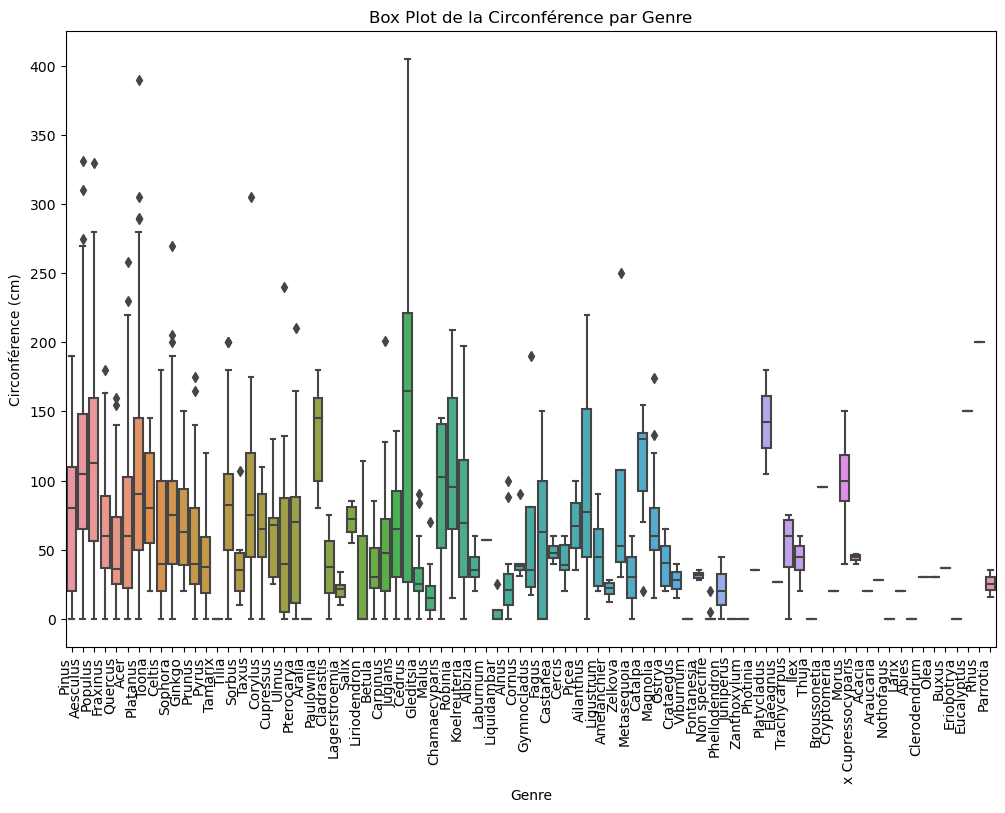

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supprimez les valeurs manquantes dans la colonne 'GENRE'
df_genre_filtered = df.dropna(subset=['GENRE'])

# Créez un box plot avec seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='GENRE', y='CIRCONFERENCE (cm)', data=df_genre_filtered)

# Ajoutez des labels et un titre
plt.xlabel('Genre')
plt.ylabel('Circonférence (cm)')
plt.title('Box Plot de la Circonférence par Genre')

# Affichez le graphique
plt.xticks(rotation=90, ha='right')  # Rotation des labels sur l'axe x pour une meilleure lisibilité
plt.show()

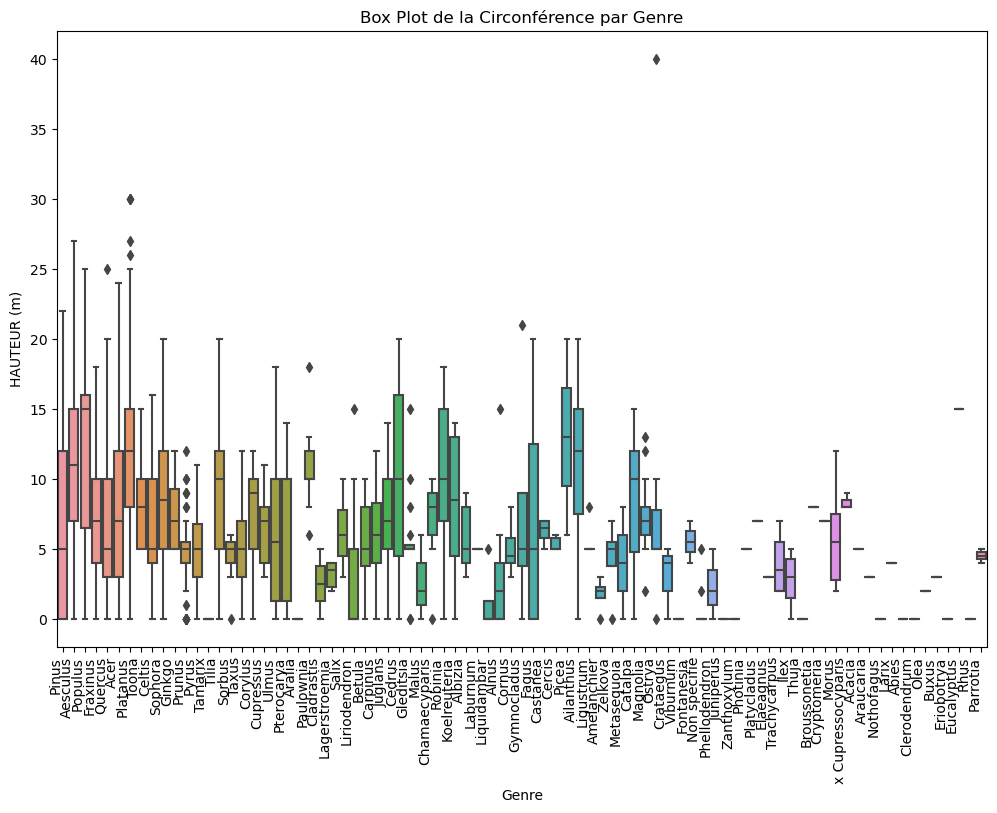

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supprimez les valeurs manquantes dans la colonne 'GENRE'
df_genre_filtered = df.dropna(subset=['GENRE'])

# Créez un box plot avec seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='GENRE', y='HAUTEUR (m)', data=df_genre_filtered)

# Ajoutez des labels et un titre
plt.xlabel('Genre')
plt.ylabel('HAUTEUR (m)')
plt.title('Box Plot de la Circonférence par Genre')

# Affichez le graphique
plt.xticks(rotation=90, ha='right')  # Rotation des labels sur l'axe x pour une meilleure lisibilité
plt.show()

In [27]:
df2.to_csv('df2.csv', index=False)

In [25]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Charger le DataFrame nettoyé
df_cleaned = pd.read_csv('votre_fichier.csv')  # Assurez-vous de spécifier le chemin correct

# Créer une application Dash
app = dash.Dash(__name__)

# Créer un histogramme de circonférence en fonction du domaine
fig_circonference = px.histogram(df_cleaned, x='CIRCONFERENCE (cm)', color='DOMANIALITE',
                                  marginal='rug', hover_data=df_cleaned.columns)

# Créer un histogramme de hauteur en fonction du stade de développement
fig_hauteur = px.histogram(df_cleaned, x='HAUTEUR (m)', color='STADE DE DEVELOPPEMENT',
                            marginal='rug', hover_data=df_cleaned.columns)

# Mise en page de l'application Dash
app.layout = html.Div(children=[
    html.H1(children='Visualisation des données'),

    html.Div(children=[
        html.H2(children='Histogramme de circonférence en fonction du domaine'),
        dcc.Graph(
            id='histogram-circonference',
            figure=fig_circonference
        )
    ]),

    html.Div(children=[
        html.H2(children='Histogramme de hauteur en fonction du stade de développement'),
        dcc.Graph(
            id='histogram-hauteur',
            figure=fig_hauteur
        )
    ])
])

# Exécuter l'application Dash
if __name__ == '__main__':
    app.run_server(debug=True)


FileNotFoundError: [Errno 2] No such file or directory: 'votre_fichier.csv'

In [ ]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Application de suivi du changement climatique"),
    dcc.Dropdown(
        id="commune",
        options=[{"label": c, "value": c} for c in ["Paris", "Lyon", "Marseille"]],
        value="Paris",
    ),
    dcc.Graph(id="line-plot"),
    dcc.Graph(id="stripes-plot"),
])

In [ ]:
def get_data(commune):
    url = f"https://donneespubliques.meteofrance.fr/donnees/climat/taux-de-variation-annuel-des-temperatures-moyenne-mensuelle-a-l-echelle-communale-depuis-1961/taux-de-variation-annuel-des-temperatures-moyenne-mensuelle-a-l-echelle-communale-depuis-1961-{commune}.csv"
    response = requests.get(url)
    data = pd.read_csv(response.content)
    return data
